In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
average_scores_path = "naep.csv"
fed_revenue_path = "states.csv"

# Read the mouse data and the study results
scores_data = pd.read_csv(average_scores_path)
revenue_data = pd.read_csv(fed_revenue_path)

# Combine the data into a single dataset
merged_data_df = pd.merge(scores_data, revenue_data, how='inner', left_on=['STATE','YEAR'], right_on=['STATE', 'YEAR'])


# Display the data table for preview
merged_data_df

# output file (csv)
output_data_file = "clean_math_8.csv"
output_data_file = "clean_reading_8.csv"

In [3]:
test_subject = merged_data_df.groupby(['TEST_SUBJECT'])
test_subject.head()

,YEAR,STATE,AVG_SCORE,TEST_SUBJECT,TEST_YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
0,2015,Alabama,230.9774227,Mathematics,4,734974.0,7360222,795238,4080167,2484817,7501799,3817479,2414860,594283.0,510091
1,2015,Alabama,266.5553185,Mathematics,8,734974.0,7360222,795238,4080167,2484817,7501799,3817479,2414860,594283.0,510091
2,2015,Alabama,217.0490898,Reading,4,734974.0,7360222,795238,4080167,2484817,7501799,3817479,2414860,594283.0,510091
3,2015,Alabama,258.7537615,Reading,8,734974.0,7360222,795238,4080167,2484817,7501799,3817479,2414860,594283.0,510091
4,2015,Alaska,236.328417,Mathematics,4,130755.0,2920986,344111,2026555,550320,2968341,1484610,1068849,92766.0,281914
5,2015,Alaska,280.4934562,Mathematics,8,130755.0,2920986,344111,2026555,550320,2968341,1484610,1068849,92766.0,281914
6,2015,Alaska,212.7926002,Reading,4,130755.0,2920986,344111,2026555,550320,2968341,1484610,1068849,92766.0,281914
7,2015,Alaska,260.3170188,Reading,8,130755.0,2920986,344111,2026555,550320,2968341,1484610,1068849,92766.0,281914
8,2015,Arizona,237.6117554,Mathematics,4,944978.0,8230507,1093834,3232013,3904660,7902600,3846357,2880184,478876.0,497662
10,2015,Arizona,215.3113365,Reading,4,944978.0,8230507,1093834,3232013,3904660,7902600,3846357,2880184,478876.0,497662


In [25]:
year_2015 = merged_data_df[(merged_data_df['YEAR'] == 2015)]

math = year_2015[year_2015['TEST_SUBJECT'] == 'Mathematics']
#math
grade_8_math = math[math['TEST_YEAR'] == 8]
grade_8_math

,YEAR,STATE,AVG_SCORE,TEST_SUBJECT,TEST_YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
1,2015,Alabama,266.5553185,Mathematics,8,734974.0,7360222,795238,4080167,2484817,7501799,3817479,2414860,594283.0,510091
5,2015,Alaska,280.4934562,Mathematics,8,130755.0,2920986,344111,2026555,550320,2968341,1484610,1068849,92766.0,281914
9,2015,Arizona,282.9194894,Mathematics,8,944978.0,8230507,1093834,3232013,3904660,7902600,3846357,2880184,478876.0,497662
13,2015,Arkansas,275.0647564,Mathematics,8,479682.0,5308625,581412,4075118,652095,5350543,2620399,1772639,290396.0,511556
17,2015,California,275.324573,Mathematics,8,6226523.0,78248042,7556365,42360470,28331207,78365958,38951948,23501848,3754315.0,6373893
21,2015,Colorado,285.5391887,Mathematics,8,872320.0,9648297,715254,4354525,4578518,9557682,4578938,3170482,397263.0,923360
25,2015,Connecticut,283.9566773,Mathematics,8,505366.0,11099837,444073,4353546,6302218,10542667,6006275,3233901,362941.0,530491
29,2015,Delaware,279.8102438,Mathematics,8,121845.0,2017075,137544,1142333,737198,1975093,1072395,583951,122741.0,103129
33,2015,District of Columbia,263.0597763,Mathematics,8,46155.0,1382282,146366,0,1235916,1360942,557345,379854,41841.0,381902
37,2015,Florida,275.323818,Mathematics,8,2743641.0,26971491,3118041,10661586,13191864,27277049,14931173,8186082,1816178.0,1681665


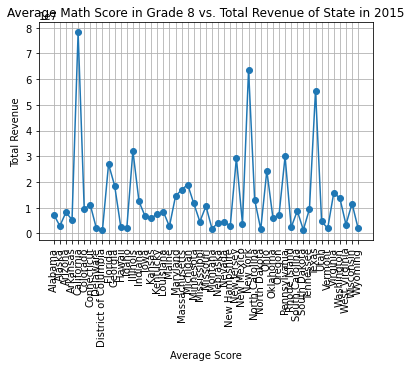

In [26]:
states = grade_8['STATE']
y_axis = grade_8['AVG_SCORE']

# math test score in year 8 vs. revenue in 2015
plt.plot(grade_8['AVG_SCORE'], grade_8['TOTAL_REVENUE'], marker = 'o')

#label the x axis tick marks, using index values so names of drug regimen appear
tick_locations = [value for value in y_axis]
plt.xticks(tick_locations, states)

# rotate x axis labels for clarity
plt.xticks(rotation=90)


# give graph labels and grid
plt.title(f'Average Math Score in Grade 8 vs. Total Revenue of State in 2015')
plt.xlabel('Average Score')
plt.ylabel('Total Revenue')
plt.grid(True)

# show the plot
plt.show()



In [27]:
year_2015_2 = merged_data_df[(merged_data_df['YEAR'] == 2015)]

reading = year_2015[year_2015['TEST_SUBJECT'] == 'Reading']
#math
grade_8_reading = reading[reading['TEST_YEAR'] == 8]
grade_8_reading

,YEAR,STATE,AVG_SCORE,TEST_SUBJECT,TEST_YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
3,2015,Alabama,258.7537615,Reading,8,734974.0,7360222,795238,4080167,2484817,7501799,3817479,2414860,594283.0,510091
7,2015,Alaska,260.3170188,Reading,8,130755.0,2920986,344111,2026555,550320,2968341,1484610,1068849,92766.0,281914
11,2015,Arizona,262.7693918,Reading,8,944978.0,8230507,1093834,3232013,3904660,7902600,3846357,2880184,478876.0,497662
15,2015,Arkansas,258.768268,Reading,8,479682.0,5308625,581412,4075118,652095,5350543,2620399,1772639,290396.0,511556
19,2015,California,258.9868426,Reading,8,6226523.0,78248042,7556365,42360470,28331207,78365958,38951948,23501848,3754315.0,6373893
23,2015,Colorado,268.0732253,Reading,8,872320.0,9648297,715254,4354525,4578518,9557682,4578938,3170482,397263.0,923360
27,2015,Connecticut,273.0480304,Reading,8,505366.0,11099837,444073,4353546,6302218,10542667,6006275,3233901,362941.0,530491
31,2015,Delaware,262.6132907,Reading,8,121845.0,2017075,137544,1142333,737198,1975093,1072395,583951,122741.0,103129
35,2015,District of Columbia,247.6534449,Reading,8,46155.0,1382282,146366,0,1235916,1360942,557345,379854,41841.0,381902
39,2015,Florida,263.3830014,Reading,8,2743641.0,26971491,3118041,10661586,13191864,27277049,14931173,8186082,1816178.0,1681665


In [28]:
grade_8_reading = grade_8_reading.drop(columns=['FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE', 
                              'TOTAL_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE',
                             'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE'])


In [34]:
spending_per_student = round((grade_8_reading['INSTRUCTION_EXPENDITURE']*1000)/grade_8_reading['ENROLL'],2)
spending_per_student

3       5194.03
7      11354.14
11      4070.31
15      5462.78
19      6255.81
23      5249.15
27     11885.00
31      8801.30
35     12075.51
39      5442.10
43      5868.82
47      7553.91
51      4125.09
55      8457.32
59      5514.16
63      6696.69
67      6141.34
71      5530.70
75      6203.95
79      7985.75
83      8792.99
87     10669.76
91      6721.76
95      7753.98
99      4795.85
103     6034.83
107     6510.96
111     7834.93
115     4944.60
119     9272.15
123    11453.93
127     5436.15
131    15942.90
135     5433.48
139     7782.74
143     7261.54
147     4467.51
151     6400.79
155    10103.21
159     9824.00
163     5591.45
167     5340.14
171     5372.66
175     5343.97
179     4125.45
183    11545.97
187     6841.25
191     6069.76
195     6509.77
199     6641.20
203     9544.46
dtype: float64

In [30]:
grade_8_reading['spending_per_student'] = spending_per_student
grade_8_reading

,YEAR,STATE,AVG_SCORE,TEST_SUBJECT,TEST_YEAR,ENROLL,TOTAL_REVENUE,INSTRUCTION_EXPENDITURE,spending_per_student
3,2015,Alabama,258.7537615,Reading,8,734974.0,7360222,3817479,5194.03
7,2015,Alaska,260.3170188,Reading,8,130755.0,2920986,1484610,11354.14
11,2015,Arizona,262.7693918,Reading,8,944978.0,8230507,3846357,4070.31
15,2015,Arkansas,258.768268,Reading,8,479682.0,5308625,2620399,5462.78
19,2015,California,258.9868426,Reading,8,6226523.0,78248042,38951948,6255.81
23,2015,Colorado,268.0732253,Reading,8,872320.0,9648297,4578938,5249.15
27,2015,Connecticut,273.0480304,Reading,8,505366.0,11099837,6006275,11885.00
31,2015,Delaware,262.6132907,Reading,8,121845.0,2017075,1072395,8801.30
35,2015,District of Columbia,247.6534449,Reading,8,46155.0,1382282,557345,12075.51
39,2015,Florida,263.3830014,Reading,8,2743641.0,26971491,14931173,5442.10


In [31]:
grade_8_math = grade_8_math.drop(columns=['FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE','TOTAL_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE','OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE'])
grade_8_math

,YEAR,STATE,AVG_SCORE,TEST_SUBJECT,TEST_YEAR,ENROLL,TOTAL_REVENUE,INSTRUCTION_EXPENDITURE
1,2015,Alabama,266.5553185,Mathematics,8,734974.0,7360222,3817479
5,2015,Alaska,280.4934562,Mathematics,8,130755.0,2920986,1484610
9,2015,Arizona,282.9194894,Mathematics,8,944978.0,8230507,3846357
13,2015,Arkansas,275.0647564,Mathematics,8,479682.0,5308625,2620399
17,2015,California,275.324573,Mathematics,8,6226523.0,78248042,38951948
21,2015,Colorado,285.5391887,Mathematics,8,872320.0,9648297,4578938
25,2015,Connecticut,283.9566773,Mathematics,8,505366.0,11099837,6006275
29,2015,Delaware,279.8102438,Mathematics,8,121845.0,2017075,1072395
33,2015,District of Columbia,263.0597763,Mathematics,8,46155.0,1382282,557345
37,2015,Florida,275.323818,Mathematics,8,2743641.0,26971491,14931173


In [37]:
spending_per_student = round((grade_8_math['INSTRUCTION_EXPENDITURE']*1000)/grade_8_math['ENROLL'],2)
spending_per_student
grade_8_math['spending_per_student'] = spending_per_student
grade_8_math


,YEAR,STATE,AVG_SCORE,TEST_SUBJECT,TEST_YEAR,ENROLL,TOTAL_REVENUE,INSTRUCTION_EXPENDITURE,spending_per_student
1,2015,Alabama,266.5553185,Mathematics,8,734974.0,7360222,3817479,5194.03
5,2015,Alaska,280.4934562,Mathematics,8,130755.0,2920986,1484610,11354.14
9,2015,Arizona,282.9194894,Mathematics,8,944978.0,8230507,3846357,4070.31
13,2015,Arkansas,275.0647564,Mathematics,8,479682.0,5308625,2620399,5462.78
17,2015,California,275.324573,Mathematics,8,6226523.0,78248042,38951948,6255.81
21,2015,Colorado,285.5391887,Mathematics,8,872320.0,9648297,4578938,5249.15
25,2015,Connecticut,283.9566773,Mathematics,8,505366.0,11099837,6006275,11885.00
29,2015,Delaware,279.8102438,Mathematics,8,121845.0,2017075,1072395,8801.30
33,2015,District of Columbia,263.0597763,Mathematics,8,46155.0,1382282,557345,12075.51
37,2015,Florida,275.323818,Mathematics,8,2743641.0,26971491,14931173,5442.10


In [39]:
grade_8_math.to_csv('clean_math_8.csv', index=False, header=True)
grade_8_reading.to_csv('clean_reading_8.csv', index=False, header=True)